# Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

#### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
 # Add format specifier to request url
btc_url = btc_url + "?format=json"  
eth_url=eth_url+"?format=json"  

# Execute & store get request
btc_data=requests.get(btc_url)
eth_data=requests.get(eth_url)

In [6]:
# Get content
btc_content = btc_data.content
eth_content=eth_data.content

#### Convert output to JSON

In [7]:
import json

# Formatting BTC as json
btc_data = btc_data.json()
# Add indents to JSON and output to screen
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19547250,
            "total_supply": 19547250,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 37279.0,
                    "volume_24h": 13024798554,
                    "market_cap": 729723823735,
                    "percentage_change_1h": -0.543331609387415,
                    "percentage_change_24h": 1.98396333690694,
                    "percentage_change_7d": 0.570905109558793,
                    "percent_change_1h": -0.543331609387415,
                    "percent_change_24h": 1.98396333690694,
                    "percent_change_7d": 0.570905109558793
                }
            },
            "last_updated": 1700439304
        }
    },
    "metadata": {
        "timestamp": 1700439304,
        "num_cry

In [8]:
# Formatting ETH as json
eth_data = eth_data.json()

# Add indents to JSON and output to screen
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120252684,
            "total_supply": 120252684,
            "max_supply": 120252684,
            "quotes": {
                "USD": {
                    "price": 2005.05,
                    "volume_24h": 11536769181,
                    "market_cap": 241376690288,
                    "percentage_change_1h": 0.190824427827125,
                    "percentage_change_24h": 2.3715052968329,
                    "percentage_change_7d": -1.97416253706211,
                    "percent_change_1h": 0.190824427827125,
                    "percent_change_24h": 2.3715052968329,
                    "percent_change_7d": -1.97416253706211
                }
            },
            "last_updated": 1700439301
        }
    },
    "metadata": {
        "timestamp": 1700439301,
        "

In [9]:
# Fetch current BTC price
btc_price=btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price=eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value=btc_price * my_btc
my_eth_value=eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44734.80
The current value of your 5.3 ETH is $10626.76


#### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [12]:
# Format current date as ISO format.Change the date set in the starter code to the current date.
current_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_df=api.get_bars(tickers, timeframe, start=current_date, end=current_date).df
ticker_df

# Reorganize the DataFrame

AGG=ticker_df[ticker_df["symbol"]=="AGG"].drop(columns="symbol")
SPY=ticker_df[ticker_df["symbol"]=="SPY"].drop(columns="symbol")

# Concatenate the ticker DataFrames
my_portfolio= pd.concat([AGG,SPY], axis="columns" ,keys=["AGG","SPY"])

# Preview DataFrame
my_portfolio

AGG                                               \
                           close    high     low trade_count    open   volume   
timestamp                                                                       
2019-05-01 04:00:00+00:00  108.4  108.76  108.32       23490  108.47  7722131   

                                          SPY                             \
                                 vwap   close    high    low trade_count   
timestamp                                                                  
2019-05-01 04:00:00+00:00  108.446022  291.82  294.95  291.8      337375   

                                                         
                             open    volume        vwap  
timestamp                                                
2019-05-01 04:00:00+00:00  294.72  72689383  293.435567

In [13]:
# Pick AGG and SPY close prices

agg_close_price=float(my_portfolio["AGG"]["close"])
spy_close_price=float(my_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.4
Current SPY closing price: $291.82


In [14]:
# Compute the current value of shares
my_agg_value=agg_close_price * my_agg
my_spy_value=spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14591.00
The current value of your 200 AGG shares is $21680.00


#### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
total_crypto=my_btc_value + my_eth_value
total_shares=my_agg_value + my_spy_value

# Create savings DataFrame
df_savings=pd.DataFrame()
df_savings.index=["crypto","shares"]
df_savings["amount"]=[total_crypto,total_shares]


# Display savings DataFrame
display(df_savings)

,amount
crypto,55361.565
shares,36271.000


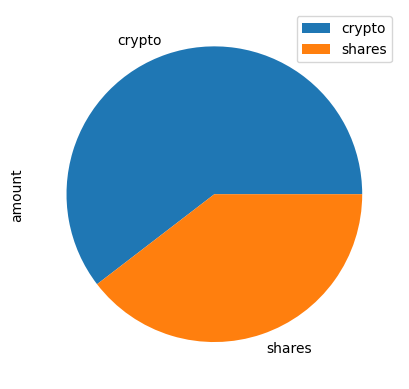

In [16]:
# Plot savings pie chart
df_saving_plot=df_savings.plot.pie(subplots=True)
plt.savefig('MC_fiveyear_dist_plot.png')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_total_savings=df_savings["amount"].sum()


# Validate saving health
if my_total_savings > emergency_fund:
    print(f"Congratulations!!!! You have savings greater than the desired emergency fund by ${(my_total_savings-emergency_fund):0.2f}")
elif my_total_savings==emergency_fund:
    print("Congratulations!!!! Your savings match the desired emergency fund requirement.")
else:
    print(f" Unfortunately, You are ${(emergency_fund-my_total_savings):0.2f} less from the desired emergency fund.")
    

Congratulations!!!! You have savings greater than the desired emergency fund by $55632.57


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
timeframe = "1Day"

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data=api.get_bars(tickers,timeframe,start=start_date,end=end_date).df

# # Reorganize the DataFrame
agg_stock=df_stock_data[df_stock_data["symbol"]=="AGG"].drop(columns="symbol")
spy_stock=df_stock_data[df_stock_data["symbol"]=="SPY"].drop(columns="symbol")


# # Concatenate the ticker DataFrames
df_stock_data=pd.concat([agg_stock,spy_stock],axis=1,keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

In [20]:
#Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 years daily returns
mc_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[0.4,.6],             # Agg=40%  and SPY=60%
    num_simulation = num_sims,
    num_trading_days = 252*30     # for 30 years @ 252 trading days per year
)

In [21]:
# Printing the simulation input data
mc_thirty_year.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005887,1.005752,1.008542,0.998924,0.988714,0.998941,0.997077,0.988797,0.991232,0.995939,...,0.990016,1.004562,0.996073,0.990388,1.007065,1.005387,0.996352,0.995983,0.999225,0.999430
2,1.011338,1.015151,1.009200,1.002586,0.990993,0.989992,1.001689,0.991956,0.993990,0.990414,...,0.988968,1.009897,0.998486,0.984984,1.013451,1.001879,0.997370,0.993617,0.999556,1.011566
3,1.006271,1.007372,1.011640,1.009014,0.974439,0.989837,1.001876,1.002538,0.985662,0.990964,...,0.988103,1.015620,1.010806,0.982868,1.016587,1.008054,0.986133,0.990762,1.001064,1.014032
4,1.017699,1.012580,1.011930,1.015370,0.978533,0.992995,1.005296,0.997860,0.985576,0.994039,...,0.991405,1.015434,1.015443,0.979535,1.016474,1.021045,0.986154,0.989157,1.006149,1.019031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.747388,12.238691,17.294308,19.445042,34.457591,5.242737,21.322814,6.474477,54.145073,9.171500,...,4.504930,19.467657,9.265944,5.893358,10.710655,64.644965,16.500588,9.938443,10.220230,33.072791
7557,20.986261,12.133677,17.314487,19.551582,34.482494,5.280188,21.347439,6.442230,53.897765,9.176678,...,4.505026,19.485792,9.328998,5.826237,10.726639,64.970675,16.482230,9.901916,10.135333,32.727376
7558,21.110525,12.278856,17.219752,19.445034,34.500958,5.246140,21.381844,6.479082,54.032262,9.141330,...,4.504153,19.397189,9.371819,5.881678,10.755957,65.200702,16.615530,9.909608,10.155946,32.933328
7559,21.042855,12.268295,17.116861,19.509923,34.459265,5.296276,21.052657,6.468849,54.347291,9.070387,...,4.456887,19.386559,9.370726,5.953854,10.812677,65.131051,16.667147,9.902528,10.188677,32.697408


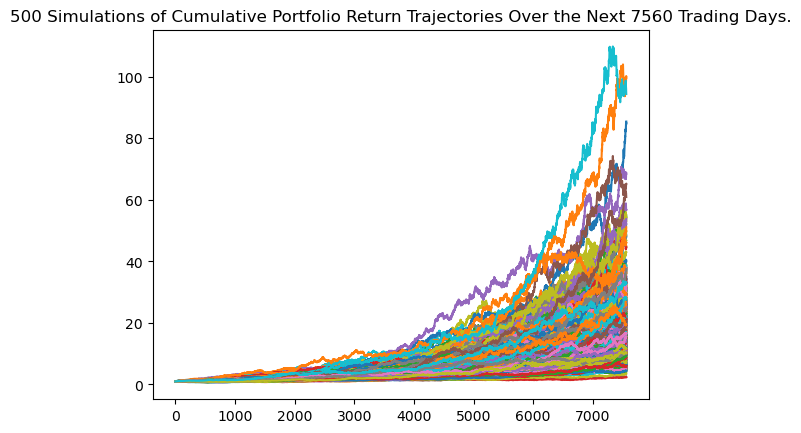

In [45]:
# Plot simulation outcomes
line_plot=mc_thirty_year.plot_simulation()
line_plot
plt.savefig("monte_Carlo.png")

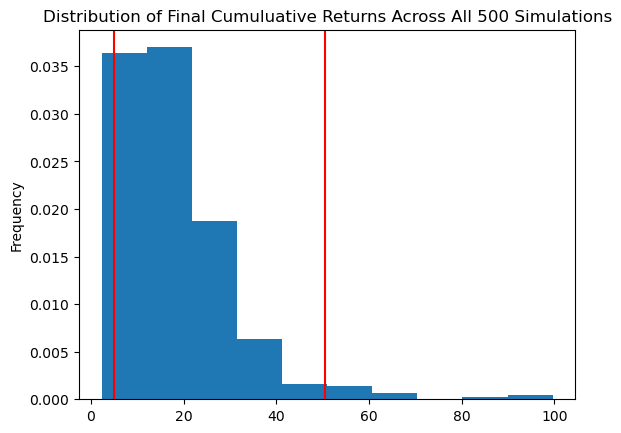

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = mc_thirty_year.plot_distribution()
plt.savefig("mc_histogram.png")

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_year_tbl = mc_thirty_year.summarize_cumulative_return()

# Print summary statistics
thirty_year_tbl

count           500.000000
mean             18.330502
std              12.232920
min               2.320979
25%               9.753337
50%              15.110859
75%              23.570371
max              99.635131
95% CI Lower      5.021753
95% CI Upper     50.470938
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_year_tbl[8]*initial_investment,2)
ci_upper = round(thirty_year_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100435.05 and $1009418.76


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
increased_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_year_tbl[8]*increased_investment,2)
ci_upper = round(thirty_year_tbl[9]*increased_investment,2)

# Print results
print(f"There is a 95% chance that an investment of ${increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $150652.58 and $1514128.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option for $20,000 investment

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# Configure a Monte Carlo simulation to forecast 5 years daily returns
mc_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[0.4,.6],             # Agg=40%  and SPY=60%
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [29]:
mc_five_year.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001712,0.993203,1.008328,0.993609,1.009014,0.990634,0.993493,1.006307,1.004109,0.998546,...,1.013066,1.009925,0.992486,0.993340,1.006417,1.000688,1.008734,0.994420,1.010075,1.005554
2,1.003780,0.996408,1.016146,0.989896,1.005944,0.987574,0.992230,1.011184,1.003393,0.997559,...,1.011933,1.009854,0.999123,0.984587,1.009068,0.990508,1.007339,0.994033,0.998181,1.000337
3,1.010500,0.995303,1.012015,0.993460,0.996279,0.991526,0.995099,1.021587,1.013187,0.994175,...,0.994068,1.007914,0.994618,0.969923,0.999750,1.001158,1.009111,0.989799,1.000683,1.001505
4,1.006062,0.999154,1.022276,1.000679,0.990075,0.993207,0.982651,1.038490,1.013036,1.006387,...,1.005785,1.003804,1.002386,0.973628,0.992436,1.002427,1.009498,0.997062,0.987960,1.002351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.304506,2.366033,1.801351,1.362082,1.252446,2.397188,1.577266,0.984117,1.869353,1.606779,...,1.808322,1.589260,1.543522,2.522886,1.868473,1.361898,2.966319,1.000362,1.322766,2.432085
1257,1.277034,2.370013,1.808416,1.366698,1.256265,2.401916,1.568491,0.977012,1.894772,1.626172,...,1.791587,1.582976,1.526515,2.499311,1.852136,1.372768,2.968789,1.000282,1.315788,2.420817
1258,1.281316,2.374981,1.816670,1.381864,1.263393,2.443648,1.584047,0.971995,1.896536,1.616508,...,1.792613,1.572066,1.525233,2.489979,1.862915,1.368192,2.947886,0.999804,1.321167,2.392863
1259,1.285787,2.368676,1.792023,1.381865,1.246667,2.463494,1.576679,0.982404,1.913165,1.634656,...,1.805476,1.566390,1.524823,2.482025,1.838885,1.381167,2.958051,0.989575,1.315628,2.408392


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

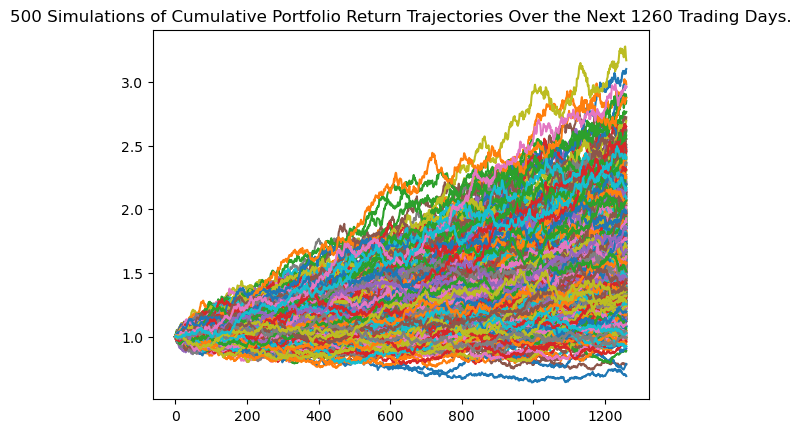

In [31]:
# Plot simulation outcomes
mc_five_year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

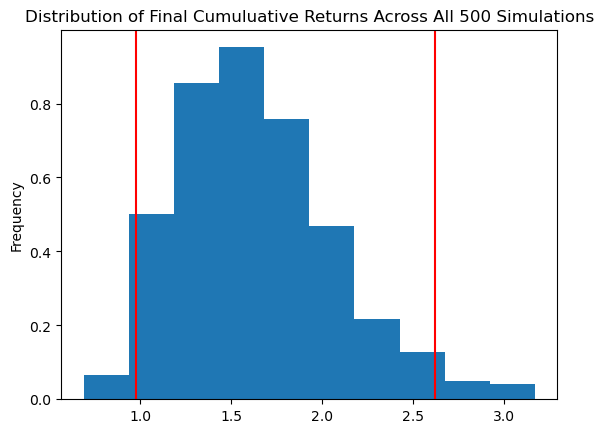

In [32]:
# Plot probability distribution and confidence intervals
mc_five_year.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = mc_five_year.summarize_cumulative_return()

# Print summary statistics
five_year_tbl

count           500.000000
mean              1.635549
std               0.431776
min               0.690783
25%               1.329101
50%               1.568482
75%               1.894036
max               3.169155
95% CI Lower      0.979605
95% CI Upper      2.622627
Name: 1260, dtype: float64

In [34]:

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(five_year_tbl[8]*increased_investment,2)
ci_upper_five = round(five_year_tbl[9]*increased_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $29388.16 and $78678.8


### Ten Years Retirement Option for the increased investment amount

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[0.4,.6],             # Agg=40%  and SPY=60%
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996663,1.002079,1.001933,0.997223,1.005836,0.996212,1.006724,1.002570,1.010081,1.009175,...,0.994908,0.996337,1.004892,1.009798,1.003982,1.010365,1.004651,0.991222,1.010096,1.007678
2,1.003413,0.995319,0.996069,0.990065,1.010440,0.998354,1.001161,1.010328,1.004417,1.011980,...,0.998810,1.001939,0.994331,1.012627,1.006058,1.008571,1.010840,0.989688,1.021914,1.011929
3,1.002738,0.999117,0.995890,0.987312,1.015980,1.006288,0.998616,0.999626,1.008835,1.002629,...,1.005963,1.008924,0.992986,1.019144,1.004955,1.004118,1.019686,0.996134,1.030817,1.004319
4,1.001139,1.001228,0.998838,0.977557,1.019765,1.013371,0.997522,0.995121,1.012573,1.002680,...,1.017705,1.009434,0.994659,1.029209,1.004384,1.002935,1.024397,0.991150,1.032195,1.011830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.025465,2.417468,2.726921,2.864031,1.736439,1.560141,2.037261,2.016233,1.986087,2.168414,...,2.183163,4.408032,3.104588,2.794816,1.801590,4.361124,2.060165,2.188538,2.295394,3.336975
2517,2.996483,2.441521,2.712979,2.866353,1.727678,1.573339,2.030000,2.025937,2.001658,2.152986,...,2.182899,4.404070,3.078524,2.788849,1.791614,4.329456,2.055829,2.178725,2.315022,3.318353
2518,2.986311,2.440893,2.688355,2.873157,1.731771,1.586748,2.027997,2.010305,1.989666,2.149363,...,2.144046,4.420622,3.061479,2.776909,1.801421,4.288984,2.037951,2.195556,2.321525,3.288129
2519,2.957653,2.423058,2.692207,2.874037,1.739321,1.579398,1.997474,2.015463,2.012398,2.126352,...,2.167367,4.394793,3.073505,2.798962,1.808186,4.291682,2.044106,2.186836,2.304721,3.334588


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

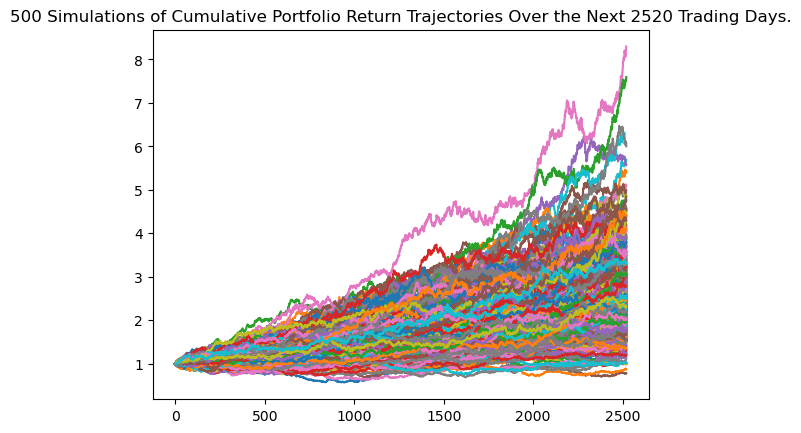

In [37]:
# Plot simulation outcomes
mc_ten_year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

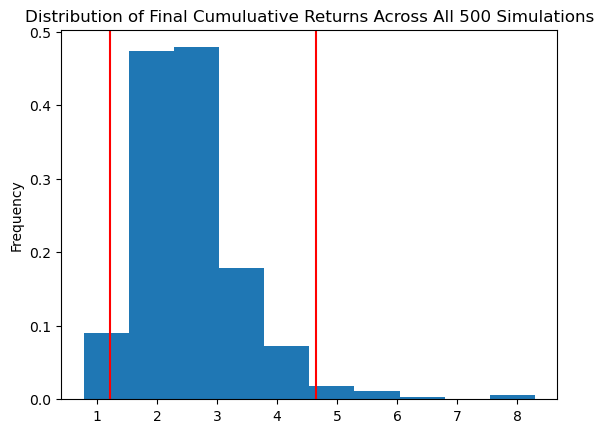

In [38]:
# Plot probability distribution and confidence intervals
mc_ten_year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl=mc_ten_year.summarize_cumulative_return()

# Print summary statistics
ten_year_tbl

count           500.000000
mean              2.551044
std               0.899761
min               0.779939
25%               1.955120
50%               2.439559
75%               2.969054
max               8.298275
95% CI Lower      1.217780
95% CI Upper      4.656889
Name: 2520, dtype: float64

In [40]:

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(ten_year_tbl[8]*increased_investment,2)
ci_upper_ten = round(ten_year_tbl[9]*increased_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $36533.39 and $139706.66
